# Diccionario de Datos - Dataset de Vinos (Wine - Scikit-learn)

Este dataset contiene información química y física de vinos provenientes de tres diferentes cultivares de uva en la región italiana. Cada fila representa una muestra de vino con 13 variables numéricas.

## Variable Objetivo

- **`target`**: Tipo de vino (cultivar)
  - `0` → Cultivar 0
  - `1` → Cultivar 1
  - `2` → Cultivar 2

---

## Variables Predictoras (Features)

- `alcohol` – Contenido de alcohol (%)
- `malic_acid` – Concentración de ácido málico
- `ash` – Contenido de ceniza
- `alcalinity_of_ash` – Alcalinidad de la ceniza
- `magnesium` – Contenido de magnesio (mg/l)
- `total_phenols` – Contenido total de compuestos fenólicos
- `flavanoids` – Cantidad de flavonoides (tipo de polifenol)
- `nonflavanoid_phenols` – Contenido de compuestos fenólicos no flavonoides
- `proanthocyanins` – Proantocianinas (tipo de pigmento fenólico)
- `color_intensity` – Intensidad del color del vino
- `hue` – Matiz del color del vino
- `od280/od315_of_diluted_wines` – Absorbancia a 280/315 nm de vinos diluidos (relacionado con compuestos fenólicos)
- `proline` – Contenido de prolina (aminoácido libre), relacionado con características sensoriales

---

## Total de columnas

- 13 columnas de entrada (features)
- 1 columna objetivo (`target`)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Cargar el dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

In [3]:
# 2. Mostrar diccionario de datos
data_dictionary = pd.DataFrame({
    "Feature": wine.feature_names,
    "Description": [
        "Alcohol content",
        "Malic acid concentration",
        "Ash content",
        "Alkalinity of ash",
        "Magnesium content",
        "Total phenolic content",
        "Flavonoid content",
        "Non-flavonoid phenolic content",
        "Proanthocyanin content",
        "Color intensity of wine",
        "Hue of wine",
        "OD280/OD315 of diluted wines",
        "Proline content"
    ]
})
data_dictionary

,Feature,Description
0,alcohol,Alcohol content
1,malic_acid,Malic acid concentration
2,ash,Ash content
3,alcalinity_of_ash,Alkalinity of ash
4,magnesium,Magnesium content
5,total_phenols,Total phenolic content
6,flavanoids,Flavonoid content
7,nonflavanoid_phenols,Non-flavonoid phenolic content
8,proanthocyanins,Proanthocyanin content
9,color_intensity,Color intensity of wine


In [4]:
# 3. Particionar los datos: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# 4. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 5. Validacion cruzada K-Fold (K=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=10000)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

print("K-Fold Accuracy scores:", cv_scores)
print("Promedio de accuracy (K-Fold):", np.mean(cv_scores))

K-Fold Accuracy scores: [0.96551724 0.93103448 1.         1.         1.        ]
Promedio de accuracy (K-Fold): 0.9793103448275862


In [7]:
# 6. Entrenamiento final con el 80% de entrenamiento
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [8]:
# 7. Evaluacion con el 20% de test
y_pred = model.predict(X_test_scaled)
print("\nReporte de clasificacion en test set:")
print(classification_report(y_test, y_pred))


Reporte de clasificacion en test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



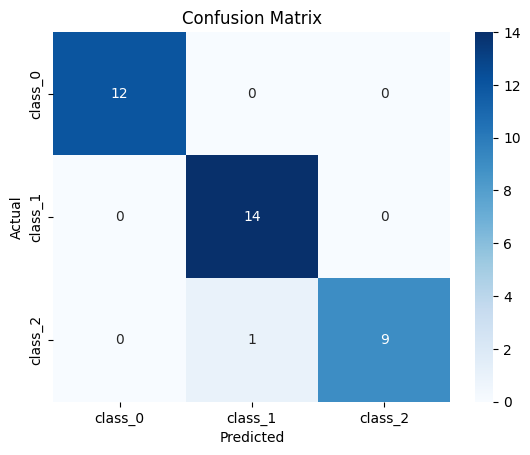

In [9]:
# 8. Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# 9. Conclusiones
print("\nConclusiones:")
print("- El promedio de accuracy en K-Fold da una idea confiable del rendimiento esperado del modelo.")
print("- El resultado en el set de test (no usado en entrenamiento ni validacion) confirma si el modelo generaliza bien.")
print("- Si el accuracy del test es similar al promedio de K-Fold, el modelo generaliza correctamente.")



Conclusiones:
- El promedio de accuracy en K-Fold da una idea confiable del rendimiento esperado del modelo.
- El resultado en el set de test (no usado en entrenamiento ni validacion) confirma si el modelo generaliza bien.
- Si el accuracy del test es similar al promedio de K-Fold, el modelo generaliza correctamente.
